Calculating order parameters:   1%|          | 1/100 [00:00<00:18,  5.22it/s]/var/folders/3n/sjbgw9357l188k3xlvvxhwyc0000gn/T/ipykernel_99229/3976880212.py:41: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(kuramoto_model, initial_phases, t, args=(K, N, temp), full_output=False)
Calculating order parameters: 100%|██████████| 100/100 [04:43<00:00,  2.84s/it]


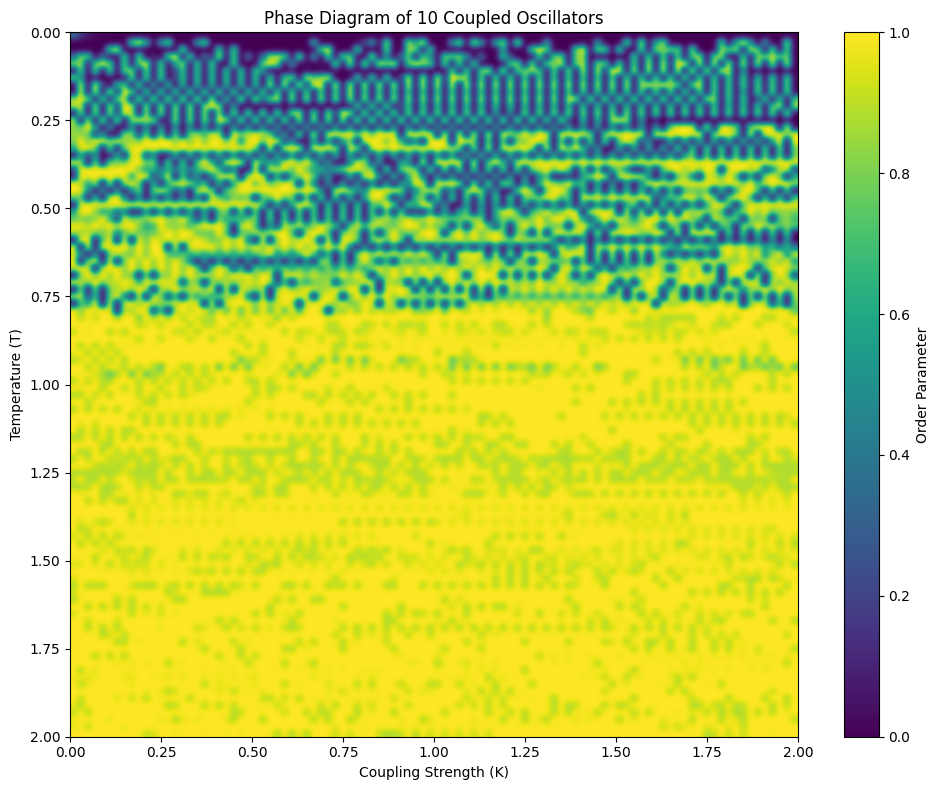

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from tqdm import tqdm

# Parameters
N = 10  # Number of oscillators
K_range = np.linspace(0, 2, 100)  # Coupling strength range
T_range = np.linspace(0, 2, 100)  # Temperature range
dt = 0.01
t = np.arange(0, 100, dt)

def kuramoto_model(phases, t, K, N, temp):
    """
    Defines the Kuramoto model differential equations.

    Parameters:
    - phases: array of oscillator phases
    - t: time
    - K: coupling strength
    - N: number of oscillators
    - temp: temperature (noise strength)

    Returns:
    - dphases_dt: derivatives of phases
    """
    phases = np.asarray(phases)
    phase_diffs = phases[:, np.newaxis] - phases
    sum_terms = np.sum(np.sin(phase_diffs), axis=1)
    noise = np.sqrt(2 * temp) * np.random.normal(0, 1, N)
    return (K / N) * sum_terms + noise

# Initialize order parameter array
order_params = np.zeros((len(T_range), len(K_range)))
initial_phases = 2 * np.pi * np.random.rand(N)  # Initial phases

# Compute order parameters over the grid of T and K
for i, temp in enumerate(tqdm(T_range, desc='Calculating order parameters')):
    for j, K in enumerate(K_range):
        try:
            solution = odeint(kuramoto_model, initial_phases, t, args=(K, N, temp), full_output=False)
        except Warning as e:
            print(f"Warning at T={temp}, K={K}: {e}")
            continue
        
        # Consider the last 20% of the simulation for steady-state
        final_states = solution[int(0.8 * len(t)):]
        r = np.abs(np.mean(np.exp(1j * final_states), axis=1))
        order_params[i, j] = np.mean(r)

# Plot the phase diagram
plt.figure(figsize=(10, 8))
im = plt.imshow(order_params, 
                extent=[K_range[0], K_range[-1], T_range[-1], T_range[0]],
                aspect='auto',
                cmap='viridis',
                interpolation='gaussian')
plt.colorbar(im, label='Order Parameter')
plt.xlabel('Coupling Strength (K)')
plt.ylabel('Temperature (T)')
plt.title(f'Phase Diagram of {N} Coupled Oscillators')
plt.tight_layout()
plt.show()
